# Sentiment Analysis and Zero-Shot Classification

## Image for Weeds

In [4]:
from google.colab import files
src = list(files.upload().values())[0]

Saving helper_functions.py to helper_functions (1).py


In [5]:
open('helper_functions.py','wb').write(src)
import helper_functions 

In [6]:
from helper_functions import *

In [7]:
import pandas as pd
!pip install numpy==1.22.0
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0rc1, 1.20.0rc2, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0rc1, 1.21.0rc2, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6)
ERROR: No matching 

In [8]:
!pip install torch torchvision torchaudio
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(-716.3689, shape=(), dtype=float32)


In [9]:
!pip install transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.2 MB/s 
     |████████████████████████████████| 163 kB 54.9 MB/s 
     |████████████████████████████████| 7.6 MB 35.4 MB/s 


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [10]:
from google.colab import files
uploaded = files.upload()

Saving ImageforWeeds.csv to ImageforWeeds (1).csv


In [11]:
df = pd.read_csv('ImageforWeeds.csv', index_col = [0])
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
4951,Garden,56444,Image All-In-One Weed Killer Ready-to-Spray,https://www.lowes.com/pd/IMAGE-All-In-One-24-o...,Lowes,ImageforWeeds,999990274,999990274,No,2021-06-22T00:00:00,2021,6,25,Excellent product,[This review was collected as part of a promot...,syndicated reviews,20.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2021-06-22,36
26257,Garden,142189,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-28T00:00:00,2022,6,26,Easy Spray Lawn Management,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-28,32
25935,Garden,141867,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Nothing noticeable,[This review was collected as part of a promot...,syndicated reviews,15.47,3,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,44
25910,Garden,141842,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Works good but messy,[This review was collected as part of a promot...,syndicated reviews,15.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,52
1701,Garden,12689,Image Kills Nutsedge Ready-to-Spray,http://www.homedepot.com/p/t/100598623,Homedepot,ImageforWeeds,100598623,100175861,Yes,2021-10-05T00:00:00,2021,10,40,Did not kill anything....,Did not kill anything.,organic reviews,19.97,1,0,0,0,No,did not kill anything.,2021-10-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,Garden,20917,Image Herbicide for St. Augustinegrass & Centi...,http://www.homedepot.com/p/t/303594320,Homedepot,ImageforWeeds,303594320,303594294,Yes,2021-10-16T00:00:00,2021,10,41,Kills weeds in St Augustine grass in about 3 w...,Kills weeds in St Augustine grass in about 3 w...,organic reviews,12.98,5,0,0,0,No,kills weeds in st augustine grass in about 3 w...,2021-10-16,12
26215,Garden,142147,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-18T00:00:00,2022,6,24,Works well,[This review was collected as part of a promot...,syndicated reviews,13.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-18,48
25504,Garden,141436,Image Kills Nutsedge Ready-to-Spray,http://www.homedepot.com/p/100175861,Homedepot,ImageforWeeds,100598623,100175861,Yes,2022-06-14T00:00:00,2022,6,24,New Zoysia Sod,"I live in north Georgia, and have been using I...",syndicated reviews,22.26,5,0,0,0,No,"i live in north georgia, and have been using i...",2022-06-14,46
26253,Garden,142185,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-23T00:00:00,2022,6,25,Great product!,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-23,42


# Sentiment Analysis

In [12]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [13]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

##negative with score of 0.797

[{'label': 'Positive', 'score': 0.9755468964576721}]

In [14]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [15]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment
4951,Garden,56444,Image All-In-One Weed Killer Ready-to-Spray,https://www.lowes.com/pd/IMAGE-All-In-One-24-o...,Lowes,ImageforWeeds,999990274,999990274,No,2021-06-22T00:00:00,2021,6,25,Excellent product,[This review was collected as part of a promot...,syndicated reviews,20.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2021-06-22,36,Positive
26257,Garden,142189,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-28T00:00:00,2022,6,26,Easy Spray Lawn Management,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-28,32,Positive
25935,Garden,141867,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Nothing noticeable,[This review was collected as part of a promot...,syndicated reviews,15.47,3,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,44,Neutral
25910,Garden,141842,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Works good but messy,[This review was collected as part of a promot...,syndicated reviews,15.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,52,Negative
1701,Garden,12689,Image Kills Nutsedge Ready-to-Spray,http://www.homedepot.com/p/t/100598623,Homedepot,ImageforWeeds,100598623,100175861,Yes,2021-10-05T00:00:00,2021,10,40,Did not kill anything....,Did not kill anything.,organic reviews,19.97,1,0,0,0,No,did not kill anything.,2021-10-05,4,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,Garden,20917,Image Herbicide for St. Augustinegrass & Centi...,http://www.homedepot.com/p/t/303594320,Homedepot,ImageforWeeds,303594320,303594294,Yes,2021-10-16T00:00:00,2021,10,41,Kills weeds in St Augustine grass in about 3 w...,Kills weeds in St Augustine grass in about 3 w...,organic reviews,12.98,5,0,0,0,No,kills weeds in st augustine grass in about 3 w...,2021-10-16,12,Positive
26215,Garden,142147,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-18T00:00:00,2022,6,24,Works well,[This review was collected as part of a promot...,syndicated reviews,13.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-18,48,Positive
25504,Garden,141436,Image Kills Nutsedge Ready-to-Spray,http://www.homedepot.com/p/100175861,Homedepot,ImageforWeeds,100598623,100175861,Yes,2022-06-14T00:00:00,2022,6,24,New Zoysia Sod,"I live in north Georgia, and have been using I...",syndicated reviews,22.26,5,0,0,0,No,"i live in north georgia, and have been using i...",2022-06-14,46,Neutral
26253,Garden,142185,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-23T00:00:00,2022,6,25,Great product!,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-23,42,Positive


## Zero Shot Classificaiton

In [16]:
import transformers
from transformers import pipeline

In [17]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [18]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Quality and Satisfaction, which are the factors with the two highest scores, make sense

{'sequence': '[This review was collected as part of a promotion.] This product was easy to use and did what it was advertised to do. My yard has a great look to it now!',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9974178075790405,
  0.8326179385185242,
  0.4537894129753113,
  0.0015857748221606016]}

In [19]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## The review seems to have low satisfaction and the satisfaction score (0.208) corresponds and the main reason is relevant to Quality (0.779).

{'sequence': '[This review was collected as part of a promotion.] Tried the weed & crabgrass spray. I havent notice any change in lawn appearance. Stayed the clover and danilion, but they still grow as usual. I will try longer to see if there are changes',
 'labels': ['quality', 'affordability', 'satisfaction', 'complaints'],
 'scores': [0.7785077095031738,
  0.2131129950284958,
  0.20805910229682922,
  0.19833238422870636]}

In [20]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## It is a mild complaint and the score corresponds (0.459)

{'sequence': '[This review was collected as part of a promotion.] The product seems to work great on killing the grass that we dont want but when we applied it the bottle didnt seem to hook up to the water hose fully so there was water spraying everywhere it was just a huge mess.',
 'labels': ['complaints', 'quality', 'affordability', 'satisfaction'],
 'scores': [0.4592539966106415,
  0.10848885774612427,
  0.022764824330806732,
  0.006871566642075777]}

In [21]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## This is related to Quality (0.925) but the sentiment is Complaints (0.032), not Satisfaction (0.635) and thus the result does not match.

{'sequence': 'Did not kill anything.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9254496693611145,
  0.6352580785751343,
  0.4688342213630676,
  0.03157944232225418]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [22]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [23]:
#insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [24]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [25]:
#create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
4951,Garden,56444,Image All-In-One Weed Killer Ready-to-Spray,https://www.lowes.com/pd/IMAGE-All-In-One-24-o...,Lowes,ImageforWeeds,999990274,999990274,No,2021-06-22T00:00:00,2021,6,25,Excellent product,[This review was collected as part of a promot...,syndicated reviews,20.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2021-06-22,36,Positive,0.668977,0.995549,0.998445,0.993887,0.998445
26257,Garden,142189,IMAGE Lawn Weed & Crabgrass Killer Concentrate,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670295,311670269,Yes,2022-06-28T00:00:00,2022,6,26,Easy Spray Lawn Management,[This review was collected as part of a promot...,syndicated reviews,13.47,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-28,32,Positive,0.454413,0.987949,0.998777,0.997621,0.998777
25935,Garden,141867,IMAGE Lawn Weed & Crabgrass Killer Ready-To-Spray,http://www.homedepot.com/p/311670269,Homedepot,ImageforWeeds,311670269,311670269,Yes,2022-06-13T00:00:00,2022,6,24,Nothing noticeable,[This review was collected as part of a promot...,syndicated reviews,15.47,3,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-13,44,Neutral,0.693855,0.716928,0.262990,0.313412,0.716928


In [26]:
#assign the max to its aligned type
align_list=[]
j = 0
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      # print(i)
      # print(df[t+'_m'].iloc[i])
      align_list.append(t)

df['align_type']=align_list

In [27]:
#Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,cost,ease of use,effective,efficient,All
sentiment,,,,,
Negative,57,3,32,1,93
Neutral,14,10,39,3,66
Positive,4,25,202,10,241
All,75,38,273,14,400


In [28]:
#Count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,cost,ease of use,effective,efficient
sentiment,,,,
Negative,76%,8%,12%,7%
Neutral,19%,26%,14%,21%
Positive,5%,66%,74%,71%


In [29]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results

array([['76%', '8%', '12%', '7%'],
       ['19%', '26%', '14%', '21%'],
       ['5%', '66%', '74%', '71%']], dtype=object)

# Heatmap

In [30]:
import seaborn as sns

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

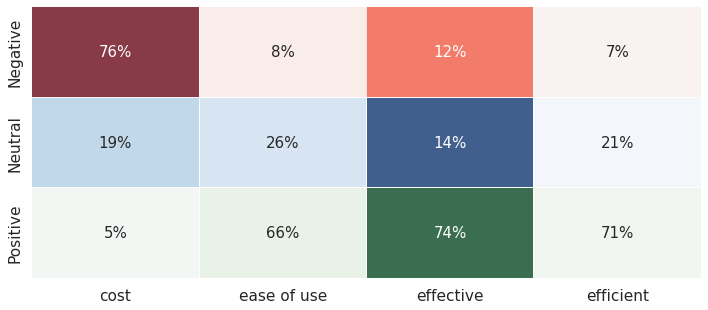

In [31]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)

# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Treemap

In [33]:
from collections import defaultdict
import plotly
import plotly.express as px

data = pd.DataFrame.from_dict(df)
fig = px.treemap(df, title='Treemap for Image for Weeds', path=['sentiment', 'align_type'])
fig.data[0].textinfo = 'label+text+value'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False
fig.show()

# Rating - Review Insight

In [34]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Reviews with rating score 1

In [35]:
df_rating1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

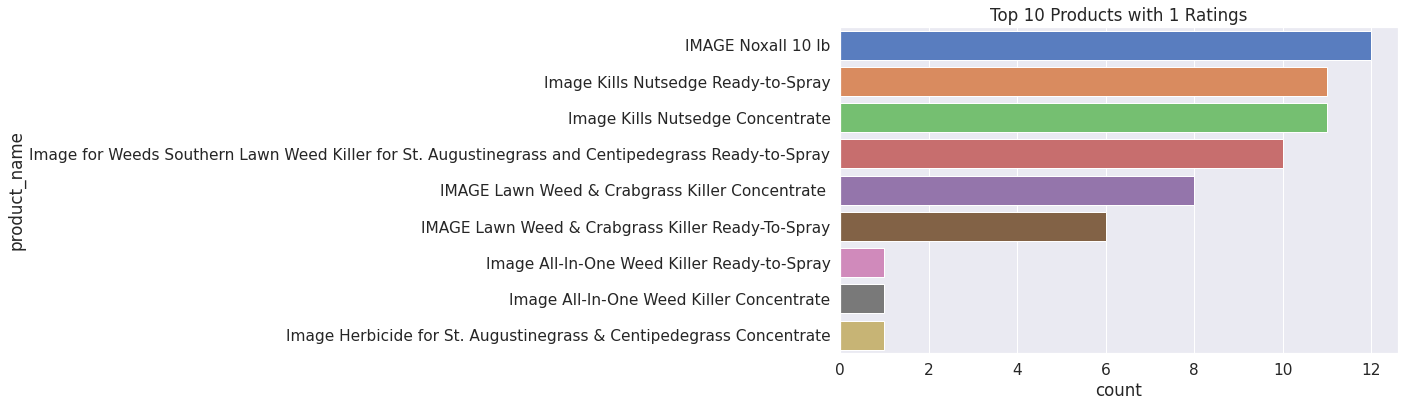

In [36]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_rating1, order = df_rating1['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



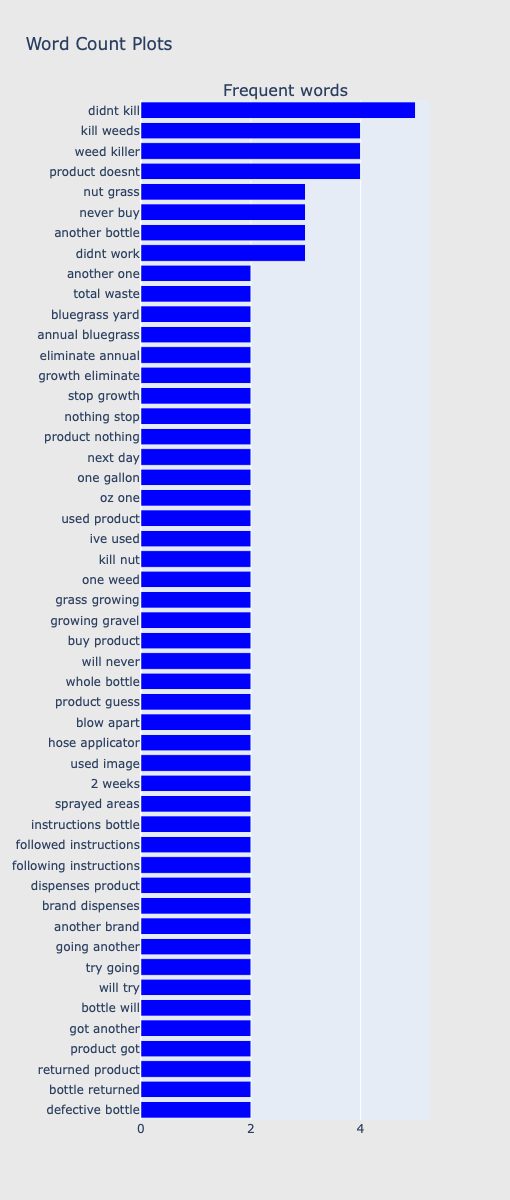

In [37]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

In [38]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_rating1, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

In [ ]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)

# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

## Reviews with rating score 5

In [40]:
df_rating5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

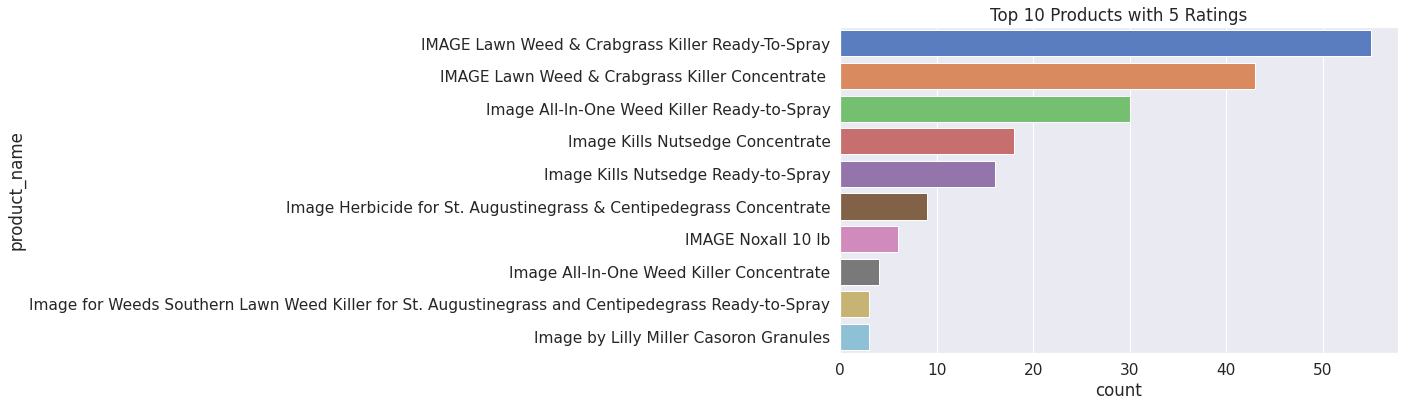

In [41]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_rating5, order = df_rating5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



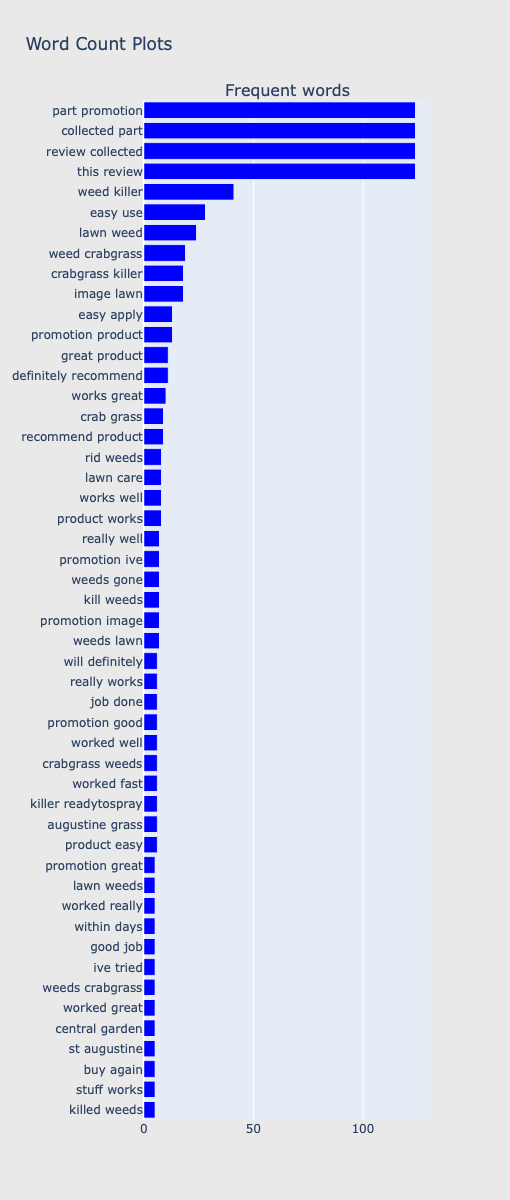

In [42]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

# Metric and Sanity Check

AttributeError: ignored

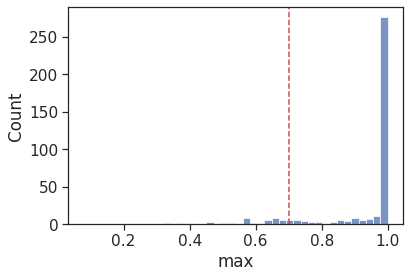

In [43]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [44]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 25910 to 25504
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               58 non-null     object 
 1   review_id             58 non-null     int64  
 2   product_name          58 non-null     object 
 3   producturl            58 non-null     object 
 4   retailer              58 non-null     object 
 5   brand                 58 non-null     object 
 6   retailer_product_id   58 non-null     object 
 7   base_id               58 non-null     object 
 8   variants_flag         58 non-null     object 
 9   review_creation_date  58 non-null     object 
 10  year                  58 non-null     int64  
 11  month                 58 non-null     int64  
 12  week                  58 non-null     int64  
 13  review_title          58 non-null     object 
 14  review_text           58 non-null     object 
 15  review_type       

In [45]:
len(df_uncat)

58